In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("bank.csv", na_values =['NA'])
cols = df.columns
cols

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [4]:
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## Data Cleaning

In [4]:
# Locate & Deal with Missing Data
# Check for Duplicates
# Detect Outliers 
# Normalize Casing 


In [5]:
# Locate & Deal with Missing Data with isna or isnull()
missing_values_count = df.isnull().sum()
missing_values_count

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [6]:
# (1) remove all the rows that contain a missing value with this syntax - 
# dropped_val = df.dropna(inplace =True, axis =1)

In [7]:
# To check just how much data did we lose?
# print("Columns in original dataset: %d \n" % data1.shape[1])
# print("Columns with na's dropped: %d" % na_dropped.shape[1])

In [8]:
# Dealing with missing data-
# with fillna()-
# 1 - df_fill = df.fillna(method = 'pad') # or ='bfill' or = 'ffill')
# 2 - with mean , median , mode-
# df.fillna(df.median(),inplace = True)
# 3 - with specific col mean , median ,mode-
# column with mean of that column
# df['col'] = df['col'].fillna(df['col'].mean())
  

In [9]:
# with replace()-
# 1 - with some value-
# new_df = df.replace(to_replace = np.nan, value = -99) # replacing nan with -99 value.
# 2 - with mean , median , mode-
# df['A'].replace([numpy.nan], df['A'].mean(), inplace=True)

In [10]:
# (2) Check for Duplicates-
df.duplicated()
df.drop_duplicates()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [11]:
# (3) Detect Outliers-
df.describe()
# for specific cols- 
# df['col'].describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


Text(0.5, 1.0, 'previous')

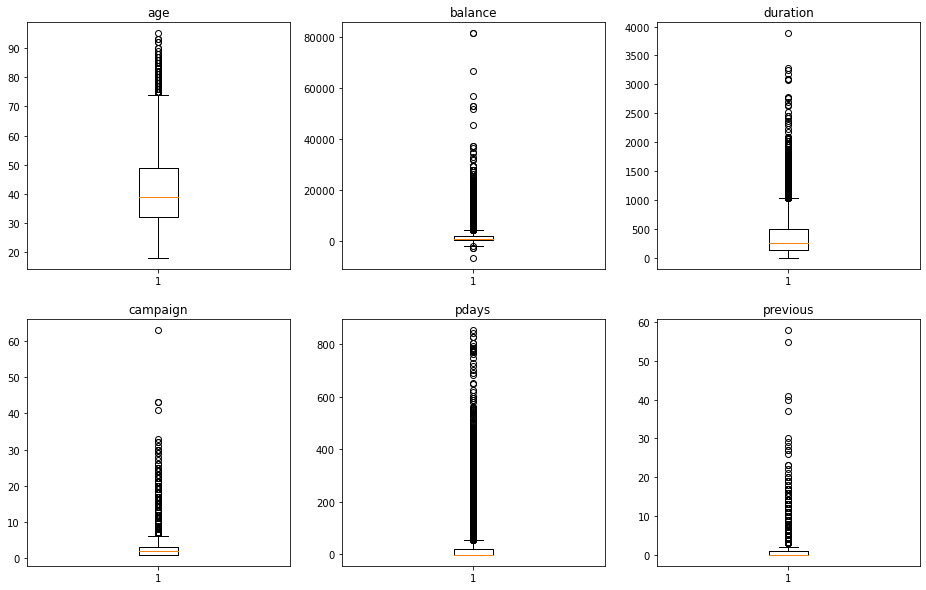

In [12]:
plt.figure(figsize = (16,10))
plt.subplot(2,3,1)
plt.boxplot(df['age'])
plt.title('age')
plt.subplot(2,3,2)
plt.boxplot(df['balance'])
plt.title('balance')
plt.subplot(2,3,3)
plt.boxplot(df['duration'])
plt.title('duration')
plt.subplot(2,3,4)
plt.boxplot(df['campaign'])
plt.title('campaign')
plt.subplot(2,3,5)
plt.boxplot(df['pdays'])
plt.title('pdays')
plt.subplot(2,3,6)
plt.boxplot(df['previous'])
plt.title('previous')

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

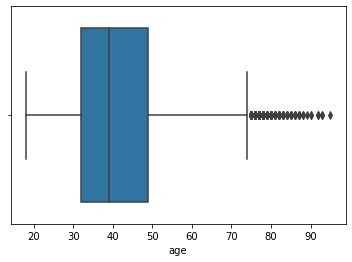

In [13]:
sns.boxplot(df['age'])

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pdays'>

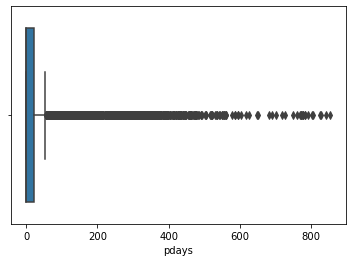

In [14]:
sns.boxplot(df['pdays'])

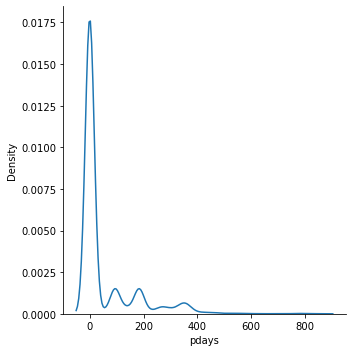

In [15]:
sns.displot(df['pdays'],kind = 'kde')

In [16]:
df['pdays'].describe()

count    11162.000000
mean        51.330407
std        108.758282
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         20.750000
max        854.000000
Name: pdays, dtype: float64

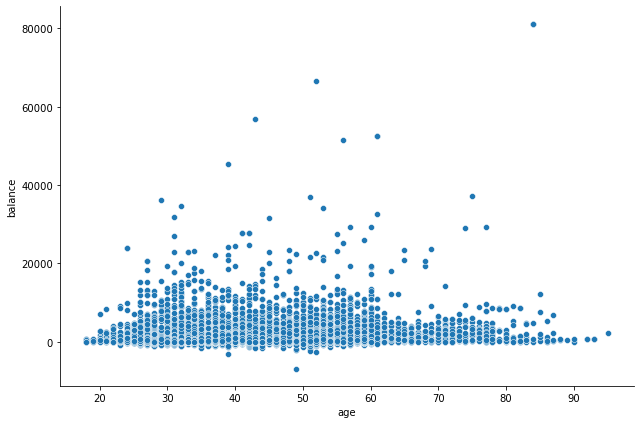

In [17]:
# scatter plot
sns.relplot(x = 'age', y = 'balance', data = df, height = 6, aspect = 1.5) # kind = 'line' or 'scatter' 
plt.show()

In [18]:
# some thinking-
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
# print(IQR)
outliers = (df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))
# print(np.where(outliers.values == True)]
outliers                                     

C:\Users\deepak\AppData\Local\Temp\ipykernel_15920\530239831.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))


,age,balance,campaign,contact,day,default,deposit,duration,education,housing,job,loan,marital,month,pdays,poutcome,previous
0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11158,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11159,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11160,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True


In [ ]:
# cols = ['age','balance','duration','campaign','pdays','previous']
# df[cols]

In [ ]:
# zero variance check- feature/cols drops

In [16]:
df.var()

C:\Users\deepak\AppData\Local\Temp\ipykernel_11216\1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


age         1.419284e+02
balance     1.040329e+07
day         7.090885e+01
duration    1.204981e+05
campaign    7.409704e+00
pdays       1.182836e+04
previous    5.253297e+00
dtype: float64

In [17]:
var = df.var()

C:\Users\deepak\AppData\Local\Temp\ipykernel_11216\439990033.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  var = df.var()


In [18]:
variable = [ ]

for i in range(0,len(var)):          
        if var[i]<=0.006: #setting the threshold as 1%
            variable.append(df.columns[i])

In [19]:
variable

[]

In [20]:
df = df.drop[variable]

TypeError: 'method' object is not subscriptable

In [ ]:
## IQR method

In [21]:
def IQR1(df,cols):
    # find the limits
    q1 = df[cols].quantile(0.25)
    q3 = df[cols].quantile(0.75)
    iqr = q3-q1
    #q1, q3, iqr
    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)
    lower_limit, upper_limit
    # find the outliers
    outliers = df.index[(df[cols] > upper_limit) | (df[cols] < lower_limit)]
    return outliers


In [22]:
cols = ['age','balance','duration','campaign','pdays','previous']
index_lst = []
for features in cols:
    index_lst.extend(IQR1(df,features)) 

In [26]:
index_lst

[1162,
 1236,
 1243,
 1274,
 1320,
 1371,
 1373,
 1380,
 1472,
 1487,
 1558,
 1582,
 1591,
 1603,
 1616,
 1731,
 2340,
 2356,
 2382,
 2397,
 2492,
 2516,
 2543,
 2544,
 2598,
 2664,
 2665,
 2709,
 2717,
 2722,
 2754,
 2764,
 2765,
 2778,
 2782,
 2793,
 2797,
 2802,
 2808,
 2809,
 2811,
 2820,
 2823,
 2825,
 2839,
 2857,
 2865,
 2885,
 2922,
 2925,
 2931,
 2932,
 2955,
 2960,
 3001,
 3002,
 3004,
 3014,
 3021,
 3029,
 3043,
 3067,
 3087,
 3088,
 3098,
 3099,
 3101,
 3116,
 3130,
 3144,
 3151,
 3156,
 3194,
 3197,
 3207,
 3249,
 3255,
 3267,
 3292,
 3311,
 3333,
 3339,
 3375,
 3380,
 3381,
 3415,
 3440,
 3446,
 3461,
 3484,
 3486,
 3500,
 3504,
 3530,
 3539,
 3546,
 3596,
 3686,
 3706,
 3716,
 3756,
 3765,
 3775,
 3786,
 3822,
 3873,
 3912,
 3941,
 3945,
 3966,
 3979,
 3989,
 4013,
 4068,
 4080,
 4106,
 4144,
 4375,
 4435,
 4550,
 4560,
 4767,
 4781,
 4784,
 4824,
 4856,
 4956,
 5014,
 5084,
 5213,
 5258,
 5284,
 5521,
 5799,
 6096,
 6140,
 6142,
 6193,
 6227,
 6249,
 6325,
 6478,
 6603,

In [27]:
df = df.drop(index_lst)

In [28]:
df.shape

(6557, 17)

In [ ]:
# capping - 
for i in xcols:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3-q1
    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)
    df.loc[(df[i]>upper_limit), i] = upper_limit
    df.loc[(df[i]<lower_limit), i] = lower_limit

In [29]:
# main-
def IQR(col):
    # find the limits
    
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    #q1, q3, iqr
    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)
    #lower_limit, upper_limit
    # find the outliers
    outliers = df.loc[(df[col] > upper_limit) | (df[col] < lower_limit)]
    return outliers





In [30]:
cols = ['age','balance','duration','campaign','pdays','previous']
for i in cols:
    x = IQR(i)
    df = pd.concat([df, x, x]).drop_duplicates(keep=False)

# Display result
print("Result:\n",df)

Result:
        age          job  marital  education default  balance housing loan  \
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
5       42   management   single   tertiary      no        0     yes  yes   
8       37   technician  married  secondary      no        1     yes   no   
10      38       admin.   single  secondary      no      100     yes   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11156   34  blue-collar   single  secondary      no      -72     yes   no   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11161   34   technician  married  secondary      no        0      no   no   

        contact  day month  duration  campaign  pdays  previous po

In [31]:
df.shape

(5849, 17)

In [32]:
# step by step , use for 1 col outlier removal

In [33]:
q1 = df['pdays'].quantile(0.25)
q3 = df['pdays'].quantile(0.75)
iqr = q3-q1
q1, q3, iqr

(-1.0, -1.0, 0.0)

In [34]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit, upper_limit

(-1.0, -1.0)

In [35]:
# find the outliers
df.loc[(df['pdays'] > upper_limit) | (df['pdays'] < lower_limit)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit


In [36]:
# trimming - delete the outlier data
df = df.loc[(df['pdays'] <= upper_limit) & (df['pdays'] >= lower_limit)]
print('after removing outliers:', len(df))
#print('after removing outliers:',len(new_df))
#print('outliers:', len(df)-len(new_df))

after removing outliers: 5849


In [ ]:
# capping - change the outlier values to upper (or) lower limit values
#new_df = df.copy()
df.loc[(new_df['age']>upper_limit), 'age'] = upper_limit
df.loc[(new_df['age']<lower_limit), 'age'] = lower_limit

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5849 entries, 3 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        5849 non-null   int64 
 1   job        5849 non-null   object
 2   marital    5849 non-null   object
 3   education  5849 non-null   object
 4   default    5849 non-null   object
 5   balance    5849 non-null   int64 
 6   housing    5849 non-null   object
 7   loan       5849 non-null   object
 8   contact    5849 non-null   object
 9   day        5849 non-null   int64 
 10  month      5849 non-null   object
 11  duration   5849 non-null   int64 
 12  campaign   5849 non-null   int64 
 13  pdays      5849 non-null   int64 
 14  previous   5849 non-null   int64 
 15  poutcome   5849 non-null   object
 16  deposit    5849 non-null   object
dtypes: int64(7), object(10)
memory usage: 822.5+ KB


In [39]:
cor_mat = df.corr()
print(cor_mat)

               age   balance       day  duration  campaign  pdays  previous
age       1.000000  0.062299 -0.003623 -0.030618  0.034777    NaN       NaN
balance   0.062299  1.000000 -0.015377  0.026413 -0.034868    NaN       NaN
day      -0.003623 -0.015377  1.000000 -0.024126  0.099626    NaN       NaN
duration -0.030618  0.026413 -0.024126  1.000000 -0.053518    NaN       NaN
campaign  0.034777 -0.034868  0.099626 -0.053518  1.000000    NaN       NaN
pdays          NaN       NaN       NaN       NaN       NaN    NaN       NaN
previous       NaN       NaN       NaN       NaN       NaN    NaN       NaN


In [31]:
# way to segregate numerical and categorical columns
df_num_col = df.select_dtypes(include = 'number')
df_cat_col = df.select_dtypes(include = 'object')

In [32]:
print(df_num_col.columns)
print(df_cat_col.columns)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')


In [42]:
# pre processing data should be done before zero variance
# encoding categorical features-
# one hot encoding
# label encoder
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    for i in df_cat_col.columns:
        res_df[i] = le.fit_transform(res_df[i])
    
    return res_df

In [43]:
#test = df.copy()
encoded_df = preprocessor(df)

In [ ]:
df_cat = df.select_dtypes(objects)
df_num = df.select_dtypes(['int64','float64'])
# one hot encoding-
#pd.get_dummies(df['jobs'])


In [ ]:
# x = pd.get_dummies(x, columns=['Geography','Gender']) # as  2 cols needs to be encoded ; x[['Geography','Gender']]
# x

In [ ]:
# label encoder-
for col in df_cat:
    le = LabelEncoder()
    df_cat[col]= le.fit_transform(df_cat[col])
    

In [27]:
df_num_col

,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0
...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0
11158,39,733,16,83,4,-1,0
11159,32,29,19,156,2,-1,0
11160,43,0,8,9,2,172,5


In [ ]:
#Scaling of data
1. MinMaxScaler
  # x_new = (x_old - min)/(max - min)
2. Standardization
  # z = (x - mean)/sd

## note - if encoding of data is done prior to scaling, then no need to iterate with df_num_col, directly apply 
 # scaling technique on whole df like - 
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# x_stand = sc.fit_transform(x) # x is my whole data after encoding
# x_stand

In [28]:
#MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
for col in df_num_col:
    mx = MinMaxScaler()
    df_num_col[col] = mx.fit_transform(df_num_col[[col]])

In [29]:
df_num_col

,age,balance,day,duration,campaign,pdays,previous
0,0.532468,0.104371,0.133333,0.268110,0.000000,0.000000,0.000000
1,0.493506,0.078273,0.133333,0.377675,0.000000,0.000000,0.000000
2,0.298701,0.092185,0.133333,0.357566,0.000000,0.000000,0.000000
3,0.480519,0.105882,0.133333,0.148750,0.000000,0.000000,0.000000
4,0.467532,0.079851,0.133333,0.172983,0.016129,0.000000,0.000000
...,...,...,...,...,...,...,...
11157,0.194805,0.077773,0.633333,0.065739,0.000000,0.000000,0.000000
11158,0.272727,0.086086,0.500000,0.020882,0.048387,0.000000,0.000000
11159,0.181818,0.078091,0.600000,0.039701,0.016129,0.000000,0.000000
11160,0.324675,0.077762,0.233333,0.001805,0.016129,0.202339,0.086207


In [34]:
#Standardization
from sklearn.preprocessing import StandardScaler
for col in df_num_col:
    ss = StandardScaler()
    df_num_col[col] = ss.fit_transform(df_num_col[[col]])

In [35]:
df_num_col

,age,balance,day,duration,campaign,pdays,previous
0,1.491505,0.252525,-1.265746,1.930226,-0.554168,-0.481184,-0.363260
1,1.239676,-0.459974,-1.265746,3.154612,-0.554168,-0.481184,-0.363260
2,-0.019470,-0.080160,-1.265746,2.929901,-0.554168,-0.481184,-0.363260
3,1.155733,0.293762,-1.265746,0.596366,-0.554168,-0.481184,-0.363260
4,1.071790,-0.416876,-1.265746,0.867171,-0.186785,-0.481184,-0.363260
...,...,...,...,...,...,...,...
11157,-0.691015,-0.473616,0.515650,-0.331287,-0.554168,-0.481184,-0.363260
11158,-0.187357,-0.246658,0.040612,-0.832564,0.547981,-0.481184,-0.363260
11159,-0.774958,-0.464934,0.396891,-0.622258,-0.186785,-0.481184,-0.363260
11160,0.148416,-0.473926,-0.909466,-1.045752,-0.186785,1.109571,1.818332


In [44]:
# Correlation - 
cor_mat = encoded_df.corr()
print(cor_mat)

                age       job   marital  education   default   balance  \
age        1.000000 -0.041318 -0.449755  -0.107708  0.001727  0.062299   
job       -0.041318  1.000000  0.070947   0.171286 -0.012337  0.040925   
marital   -0.449755  0.070947  1.000000   0.116571 -0.006053  0.041330   
education -0.107708  0.171286  0.116571   1.000000 -0.019304  0.065031   
default    0.001727 -0.012337 -0.006053  -0.019304  1.000000 -0.135032   
balance    0.062299  0.040925  0.041330   0.065031 -0.135032  1.000000   
housing   -0.145967 -0.133027 -0.029258  -0.110595 -0.004304 -0.082660   
loan      -0.007004 -0.069271 -0.066044  -0.076732  0.078633 -0.093527   
contact    0.028668 -0.095756 -0.052052  -0.136382  0.024180 -0.036418   
day       -0.003623  0.018867 -0.002055   0.022556  0.016274 -0.015377   
month     -0.059410 -0.090678  0.001830  -0.078228  0.012042 -0.013825   
duration  -0.030618  0.016817  0.030889   0.001844  0.022676  0.026413   
campaign   0.034777  0.021849 -0.06041

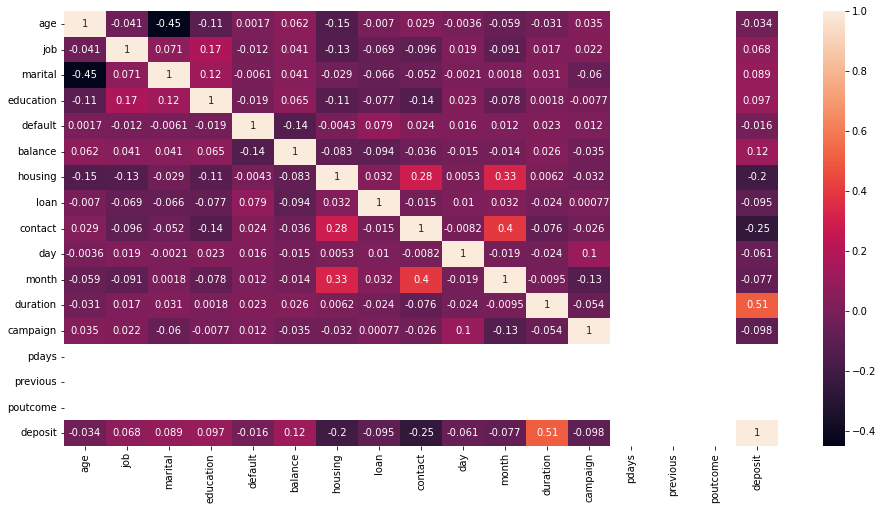

In [45]:
plt.figure(figsize = (16, 8))
sns.heatmap(encoded_df.corr(), annot = True, cmap = sns.color_palette('rocket', as_cmap=True))
plt.show()

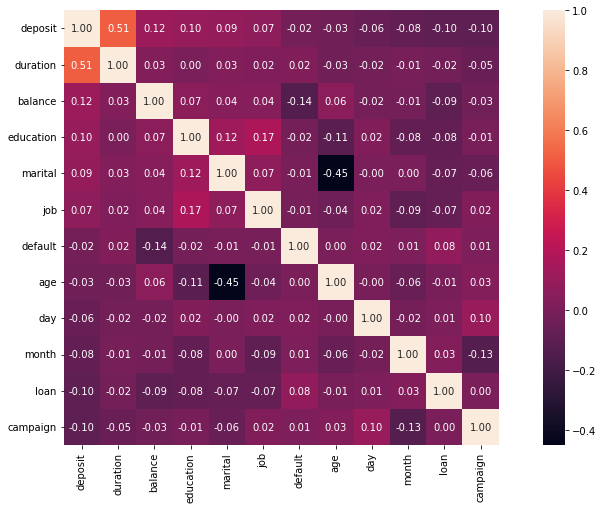

In [46]:
plt.figure(figsize = (16, 8))
k = 12 # number of variables for heatmap
cols = cor_mat.nlargest(k,'deposit')['deposit'].index
cm = np.corrcoef(encoded_df[cols].values.T)
sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',
           annot_kws = {'size':10},yticklabels = cols.values,xticklabels = cols.values)
plt.show()

In [47]:
def correlation(dataset):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    # Find features with correlation greater than 0.75
    to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
    return to_drop

# Drop features 
corr_cols = correlation(df)

dropx = df.drop(corr_cols, axis=1) #df.drop(to_drop, axis=1, inplace=True)

C:\Users\deepak\AppData\Local\Temp\ipykernel_15920\930946293.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [48]:
dropx

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
10,38,admin.,single,secondary,no,100,yes,no,unknown,7,may,786,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11156,34,blue-collar,single,secondary,no,-72,yes,no,cellular,7,jul,273,5,-1,0,unknown,no
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no


In [ ]:
# Standardization of data-
encoded_df1 = encoded_df.iloc[:,:].values  #standardize the data to normal distribution
from sklearn import preprocessing
encoded_dfx = preprocessing.scale(encoded_df1)
encoded_df = pd.DataFrame(encoded_dfx, columns=encoded_df.columns) # columns=house.columns[2:6] if iloc[:,2:6]

In [ ]:
# other way of standardization-
# from sklearn.preprocessing import StandardScaler  
# scaler = StandardScaler()  
# scaler.fit(X_train)

# X_train = scaler.transform(X_train)  
# X_test = scaler.transform(X_test)  

In [49]:
x = encoded_df.drop(['deposit'],axis =1).values
y = encoded_df['deposit'].values # target values